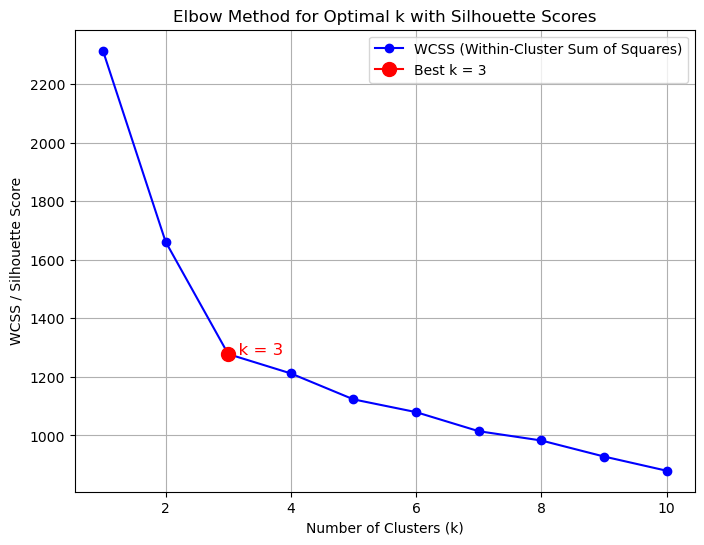

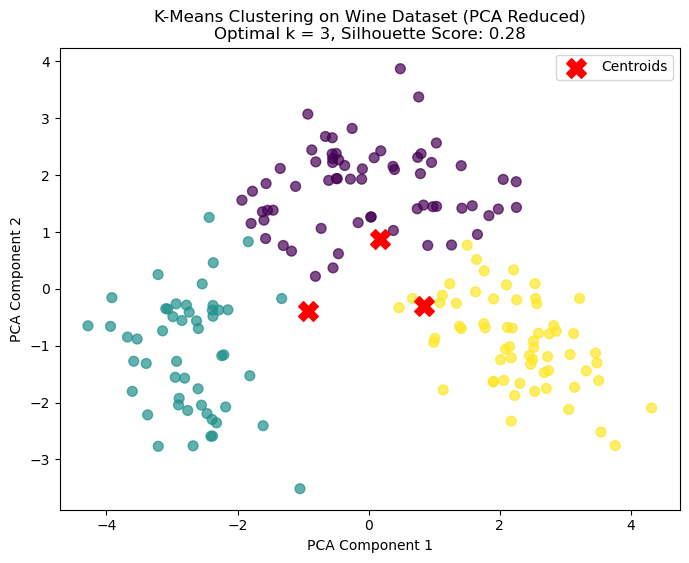

In [18]:
# K-Means Clustering Implementation with Best Cluster Marking

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# Load Wine dataset
data = load_wine()
X = data.data
y = data.target

# Standardize the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters (k)
wcss = []  # List to store WCSS for each k
sil_scores = []  # List to store silhouette scores for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia (WCSS) for each k
    if k > 1:
        sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    else:
        sil_scores.append(0)  # Silhouette score is not defined for k=1

# Plotting the Elbow method with WCSS and Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', label='WCSS (Within-Cluster Sum of Squares)', color='blue')
plt.title('Elbow Method for Optimal k with Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Silhouette Score')
# Mark the best k (e.g., k=3) on the elbow plot
best_k = 3
plt.plot(best_k, wcss[best_k - 1], marker='o', markersize=10, color='red', label=f'Best k = {best_k}')

# Add a label to highlight the best k point
plt.text(best_k, wcss[best_k - 1], f'  k = {best_k}', color='red', fontsize=12)

plt.legend()
plt.grid(True)
plt.savefig("Elbow Method for Optimal k with Silhouette Scores.png")
plt.show()

# Now applying KMeans with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, labels)

# Visualizing the clusters in a 2D space using PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters with centroids marked
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title(f'K-Means Clustering on Wine Dataset (PCA Reduced)\nOptimal k = {best_k}, Silhouette Score: {sil_score:.2f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.savefig("K-Means Clustering .png")
plt.show()